# Python Data Analysis - Chapter 8
- Signal Processing and Time Series
- Autoregressive Models exercise
- Autoregressive Moving Average Models exercise
- ARMA sunspots data [statsmodels.org]("https://www.statsmodels.org/0dev/examples/notebooks/generated/statespace_arma_0.html")

In [53]:
%matplotlib inline


In [60]:
# import libraries
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
from scipy import stats
from math import sqrt

# Read the dataset
dta = sm.datasets.sunspots.load_pandas().data
dta.index = pd.Index(pd.date_range("1700", end="2009", freq="YE-DEC"))
# del dta["YEAR"]
dta.drop('YEAR', axis=1, inplace=True)

In [61]:
from statsmodels.graphics.api import qqplot

In [62]:
print(sm.datasets.sunspots.NOTE)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.



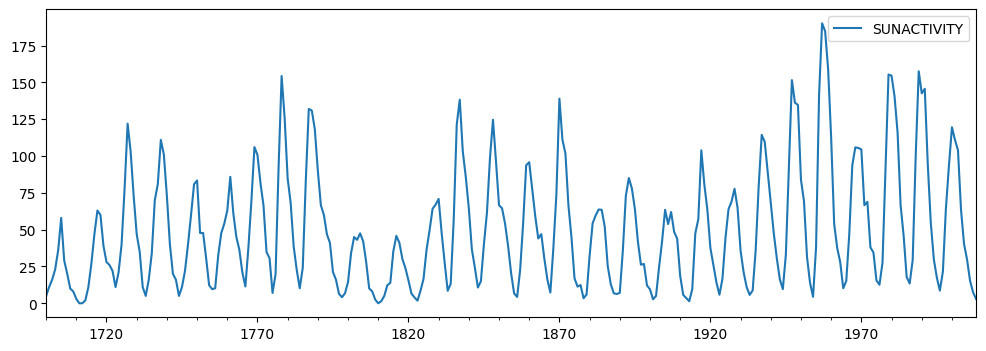

In [63]:
dta.plot(figsize=(12, 4));

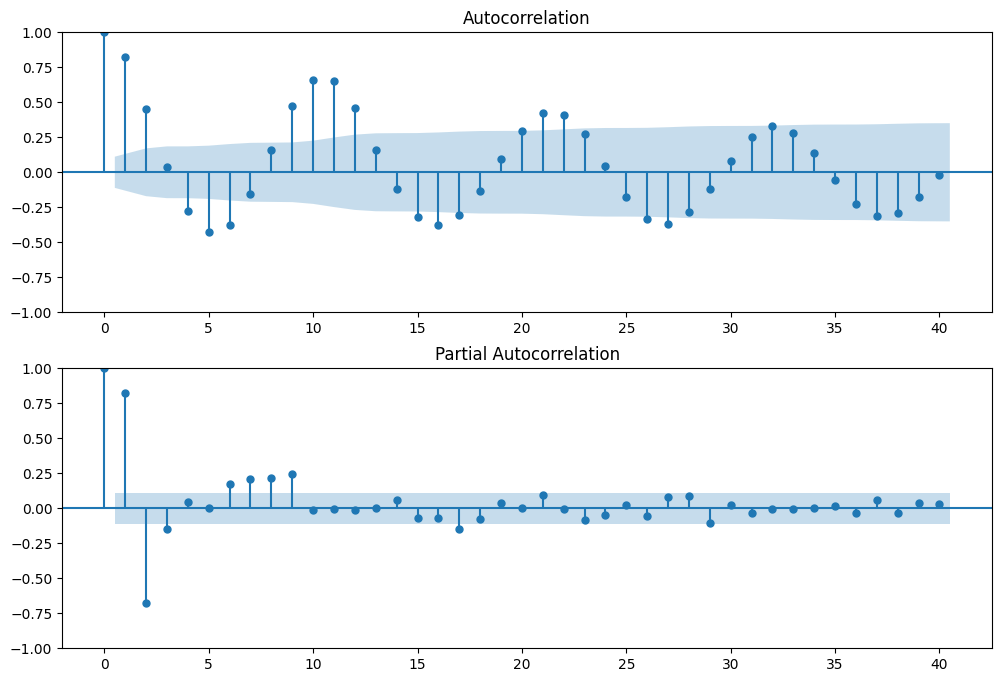

In [64]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)

In [65]:
arma_mod20 = sm.tsa.statespace.SARIMAX(dta, order=(2, 0, 0), trend="c").fit(disp=False)
print(arma_mod20.params)

intercept     14.793947
ar.L1          1.390659
ar.L2         -0.688568
sigma2       274.761104
dtype: float64


In [39]:
# split data into train and test set
train_ratio=0.8

train = dta[:int(train_ratio*len(dta))]
test = dta[int(train_ratio*len(dta)):]

In [40]:
# AutoRegression Model training
ar_model = AutoReg(train.SUNACTIVITY, lags=15)
ar_model = ar_model.fit()

# print lags and
print("Number of Lags:", len(ar_model.ar_lags))
print("Model Coefficients:\n", ar_model.params)

Number of Lags: 15
Model Coefficients:
 const              9.382322
SUNACTIVITY.L1     1.225684
SUNACTIVITY.L2    -0.512193
SUNACTIVITY.L3    -0.130695
SUNACTIVITY.L4     0.193492
SUNACTIVITY.L5    -0.168907
SUNACTIVITY.L6     0.054594
SUNACTIVITY.L7    -0.056725
SUNACTIVITY.L8     0.109404
SUNACTIVITY.L9     0.108993
SUNACTIVITY.L10   -0.117063
SUNACTIVITY.L11    0.200454
SUNACTIVITY.L12   -0.075111
SUNACTIVITY.L13   -0.114437
SUNACTIVITY.L14    0.177516
SUNACTIVITY.L15   -0.091978
dtype: float64


In [41]:
# make predictions
start_point = len(train)
end_point = start_point + len(test) -1
pred = ar_model.predict(start=start_point, end=end_point, dynamic=False)

# Calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 31.178460983500184
MSE: 1776.946382616566
RMSE: 42.15384184883468


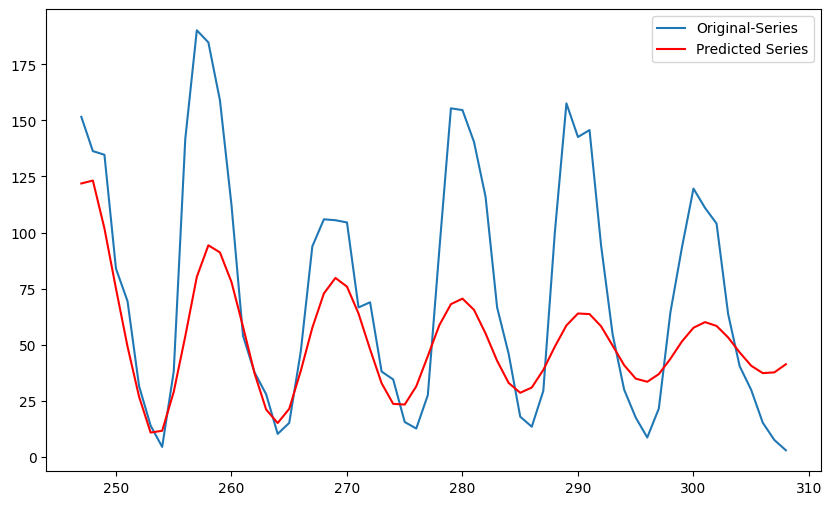

In [42]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot test data
plt.plot(test.SUNACTIVITY, label='Original-Series')

# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')

# Add legends
plt.legend()

# Display the plot
plt.show()

In [43]:
# AutoRegression Model training
arma_model = ARIMA(train, order=(10,1,0))
arma_model = arma_model.fit()

In [44]:
# make predictions
start_point = len(train)
end_point = start_point + len(test) -1
pred = arma_model.predict(start=start_point, end=end_point, dynamic=False)

# Calculate errors
mae = mean_absolute_error(test.SUNACTIVITY, pred)
mse = mean_squared_error(test.SUNACTIVITY, pred)
rmse = sqrt(mse)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

MAE: 31.29870487310681
MSE: 1475.6843629466914
RMSE: 38.4146373527942


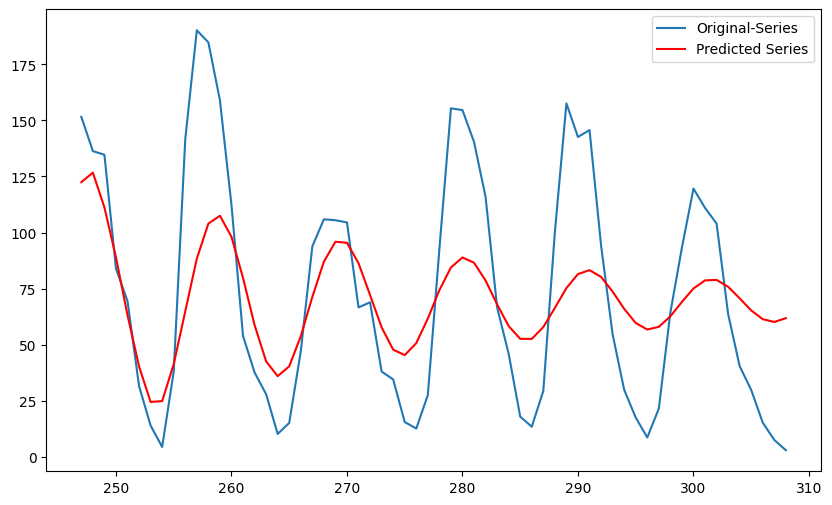

In [45]:
# Setting figure size
plt.figure(figsize=(10,6))

# Plot test data
plt.plot(test, label='Original-Series')

# Plot predictions
plt.plot(pred, color='red', label='Predicted Series')

# Add legends
plt.legend()

# Display the plot
plt.show()